In [1]:
import pandas as pd
import numpy as np

from util.base import Data
from util.id3 import Tree
from util.visualizerID3 import TreeVisualizer

## <span style="color: blue"> **Einlesen, Analysieren und Vorverarbeiten der Daten** </span>

### DataFrame aus der csv-Datei einlesen

In [2]:
csvFile="data/Bonitaet.csv"
df = pd.read_csv(csvFile)
df

,Kreditwuerdigkeit,Ausbildung,Bezahlung,Alter,Kreditkarte
0,ja,Fachkraft,monatlich,29,ja
1,nein,Fachkraft,woechentlich,31,ja
2,nein,angelernte Taetigkeit,woechentlich,23,ja
3,ja,Fachkraft,monatlich,29,nein
4,ja,Buerokraft,monatlich,21,nein
...,...,...,...,...,...
640,ja,Fachkraft,monatlich,37,ja
641,ja,Fachkraft,monatlich,50,nein
642,ja,Fachkraft,woechentlich,20,nein
643,ja,Fachkraft,monatlich,31,nein


### Zielvariable festlegen

In [3]:
classLabel = 'Kreditwuerdigkeit'

### Diagramme für die Werte der Predictorvariable <span style="color: blue"> Ausbildung </span>

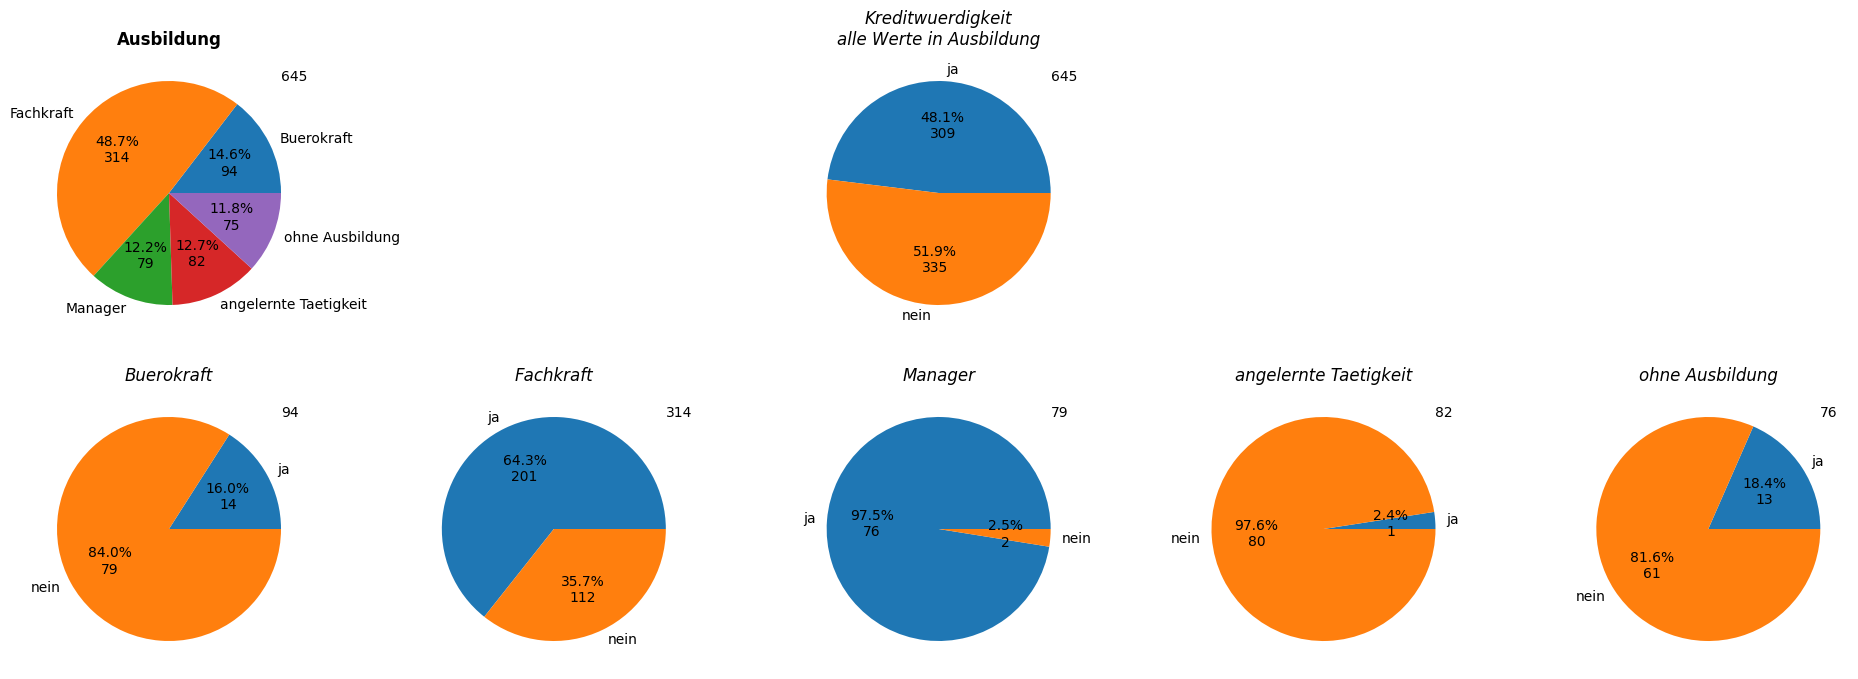

In [4]:
Data.showPieCharts(df=df, attribute='Ausbildung', classLabel=classLabel)

### Diagramme für die Werte der Predictorvariable <span style="color:blue"> Bezahlung </span>

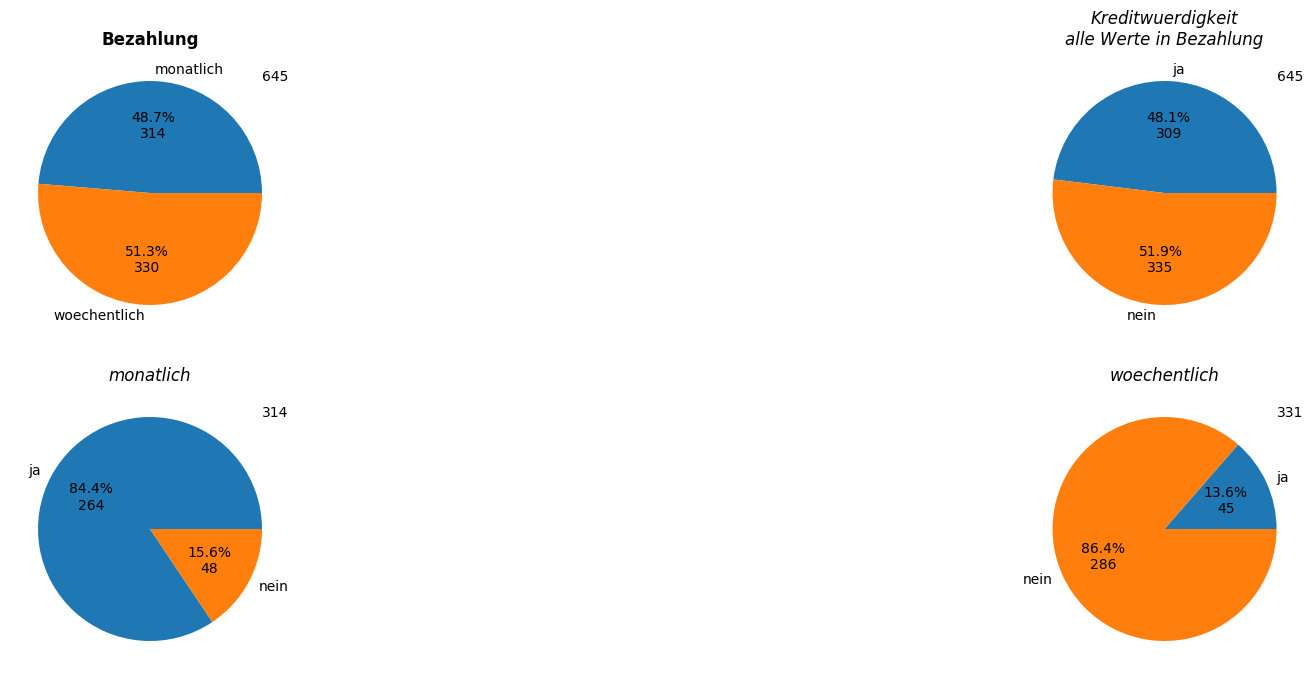

In [5]:
Data.showPieCharts(df=df, attribute='Bezahlung', classLabel=classLabel)

### Überführen numerischer Werte in kategoriale Werte: <span style="color:blue"> Alter => Altersklasse </span> 

In [6]:
# numerische Werte in kategoriale überführen   
numAttribute = 'Alter'
conditionlist = [
    (df[numAttribute] <  25) ,
    (df[numAttribute] >= 25) & (df[numAttribute] < 50),
    (df[numAttribute] >= 50)]
choicelist = ['<25', '25-49', '>49']   
df['Altersklasse'] = np.select(conditionlist, choicelist, default='unbestimmt')
df

,Kreditwuerdigkeit,Ausbildung,Bezahlung,Alter,Kreditkarte,Altersklasse
0,ja,Fachkraft,monatlich,29,ja,25-49
1,nein,Fachkraft,woechentlich,31,ja,25-49
2,nein,angelernte Taetigkeit,woechentlich,23,ja,<25
3,ja,Fachkraft,monatlich,29,nein,25-49
4,ja,Buerokraft,monatlich,21,nein,<25
...,...,...,...,...,...,...
640,ja,Fachkraft,monatlich,37,ja,25-49
641,ja,Fachkraft,monatlich,50,nein,>49
642,ja,Fachkraft,woechentlich,20,nein,<25
643,ja,Fachkraft,monatlich,31,nein,25-49


### Diagramme für die Werte der Predictorvariable <span style="color:blue"> Altersklasse </span>

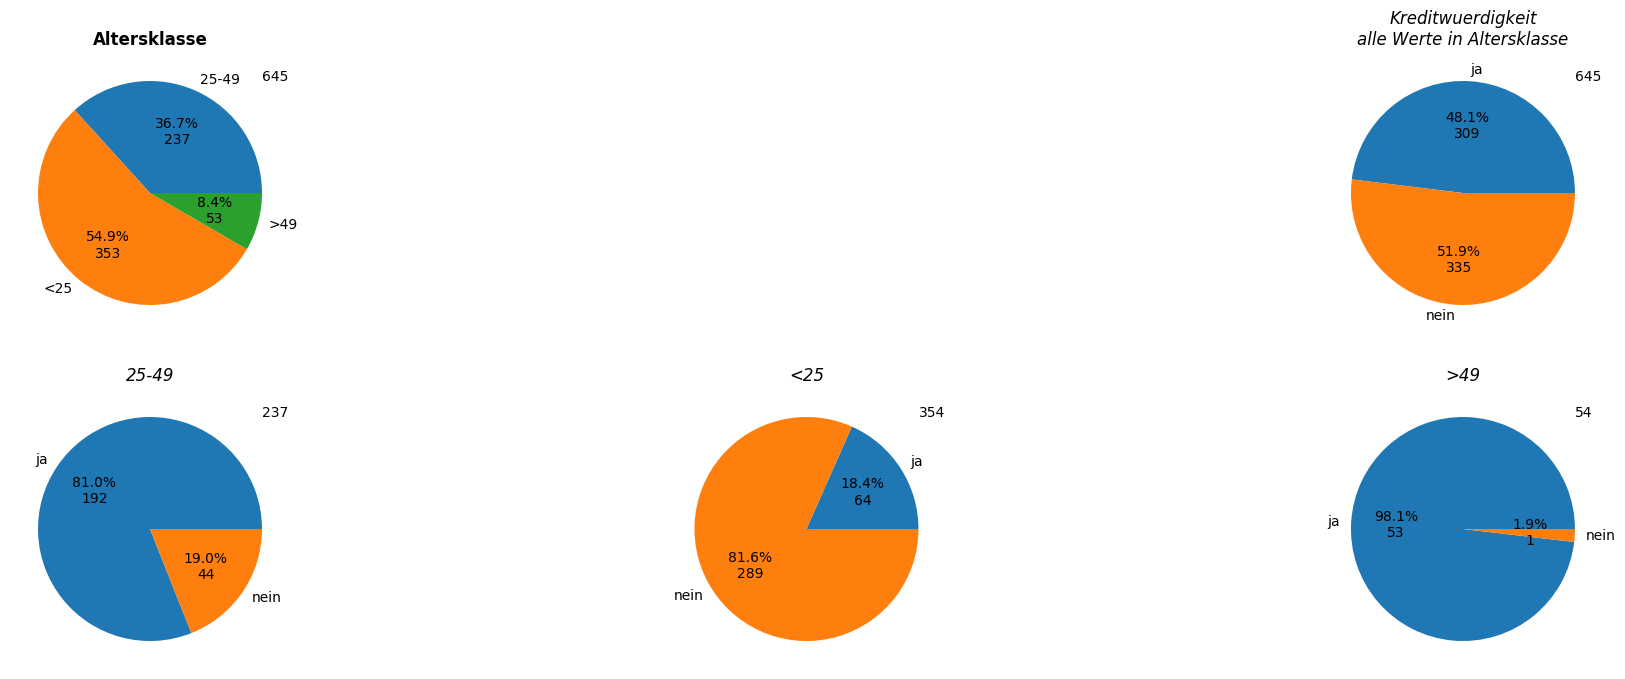

In [7]:
Data.showPieCharts(df=df, attribute='Altersklasse', classLabel=classLabel)

# <span style="color: blue"> **Initialisieren der Daten für die Modellerstellung** </span>

### Liste der Predictorvariablen festlegen


In [8]:
listOfAttributes = ['Ausbildung', 'Bezahlung', 'Altersklasse', 'Kreditkarte']

### Berechnung initialisieren und dabei Split in Trainungs-, Validierungs- und Testdatenmenge durchführen

In [9]:
data = Data(df = df)
data.initialize(listOfAttributes = listOfAttributes, classLabel = classLabel, trainProportion=0.7, valProportion=0.0)

### Trainingsdaten

In [10]:
# Testdaten
mask = df['_split'] == 'train'
df[mask]

,Kreditwuerdigkeit,Ausbildung,Bezahlung,Alter,Kreditkarte,Altersklasse,_split
1,nein,Fachkraft,woechentlich,31,ja,25-49,train
3,ja,Fachkraft,monatlich,29,nein,25-49,train
4,ja,Buerokraft,monatlich,21,nein,<25,train
7,nein,Fachkraft,monatlich,21,nein,<25,train
10,nein,ohne Ausbildung,woechentlich,20,nein,<25,train
...,...,...,...,...,...,...,...
639,ja,Fachkraft,monatlich,31,ja,25-49,train
640,ja,Fachkraft,monatlich,37,ja,25-49,train
641,ja,Fachkraft,monatlich,50,nein,>49,train
642,ja,Fachkraft,woechentlich,20,nein,<25,train


### Testdaten

In [11]:
mask = df['_split'] == 'test'
df[mask]

,Kreditwuerdigkeit,Ausbildung,Bezahlung,Alter,Kreditkarte,Altersklasse,_split
0,ja,Fachkraft,monatlich,29,ja,25-49,test
2,nein,angelernte Taetigkeit,woechentlich,23,ja,<25,test
5,ja,Manager,monatlich,19,ja,<25,test
6,ja,Fachkraft,monatlich,47,nein,25-49,test
8,nein,Fachkraft,woechentlich,21,nein,<25,test
...,...,...,...,...,...,...,...
635,ja,Buerokraft,monatlich,22,ja,<25,test
636,ja,Manager,monatlich,45,ja,25-49,test
637,ja,Fachkraft,woechentlich,45,nein,25-49,test
638,ja,Fachkraft,monatlich,23,ja,<25,test


### Validierungsdaten

In [12]:
mask = df['_split'] == 'val'
df[mask]

,Kreditwuerdigkeit,Ausbildung,Bezahlung,Alter,Kreditkarte,Altersklasse,_split


### Zusammenfassung des Split-Ergebnis

In [13]:
dfSplit = data.splitCheck()
dfSplit

,Anzahl Datensätze,Anteil an Gesamt,Anzahl 'ja',Anteil 'ja',Anzahl 'nein',Anteil 'nein'
Gesamt,645,1.000000,310,0.480620,335,0.519380
Trainingsdaten,451,0.699225,217,0.481153,234,0.518847
Validierungsdaten,0,0.000000,0,0.000000,0,0.000000
Testdaten,194,0.300775,93,0.479381,101,0.520619


# <span style="color: blue"> **Generieren des Entscheidungsbaums auf Basis der Trainingsdaten** </span>

In [14]:
id3Tree = Tree()
id3Tree.generateTree(data=data, minElements=1, maxLevel=99)

# <span style="color: blue"> **Anzeige des Entscheidungsbaums** </span>

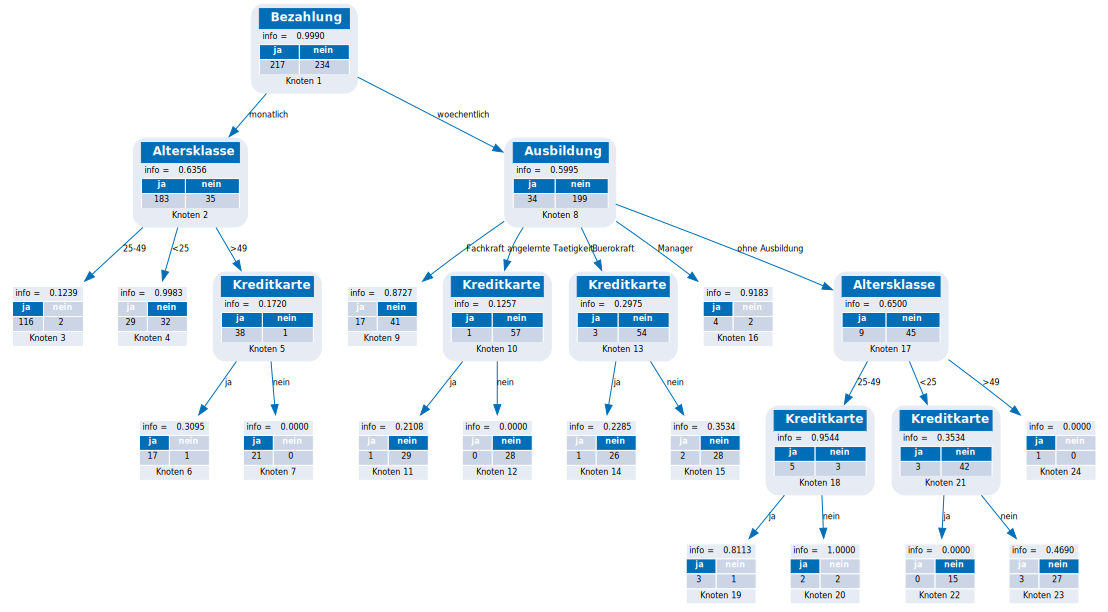

In [15]:
vs = TreeVisualizer()
dot = vs.DrawTree(tree = id3Tree)
dot

# <span style="color: blue"> **Anwenden der Entscheidungsbaums auf die Testdaten** </span>

In [16]:
mask = id3Tree.Data.Df['_split'] == 'test'
dataFrameOfResult = id3Tree.applyTree(df[mask]) 
dataFrameOfResult

,Modell,Real
0,ja,ja
2,nein,nein
5,nein,ja
6,ja,ja
8,nein,nein
...,...,...
635,nein,ja
636,ja,ja
637,nein,ja
638,nein,ja


### Ausgabe des Tests als Kreuztabelle

In [17]:
crossTable = pd.crosstab(dataFrameOfResult['Modell'],
                             dataFrameOfResult['Real'],
                             margins= True, margins_name='Summe')    
crossTable

Real,ja,nein,Summe
Modell,,,
ja,71,2,73
nein,22,99,121
Summe,93,101,194


# <span style="color: blue"> **Entscheidungsbaum mit minElements = 5** </span>

### Generieren des Entscheidungsbaums

In [18]:
id3Tree = Tree()
id3Tree.generateTree(data=data, minElements=5)

### Anzeige des Entscheidungsbaums

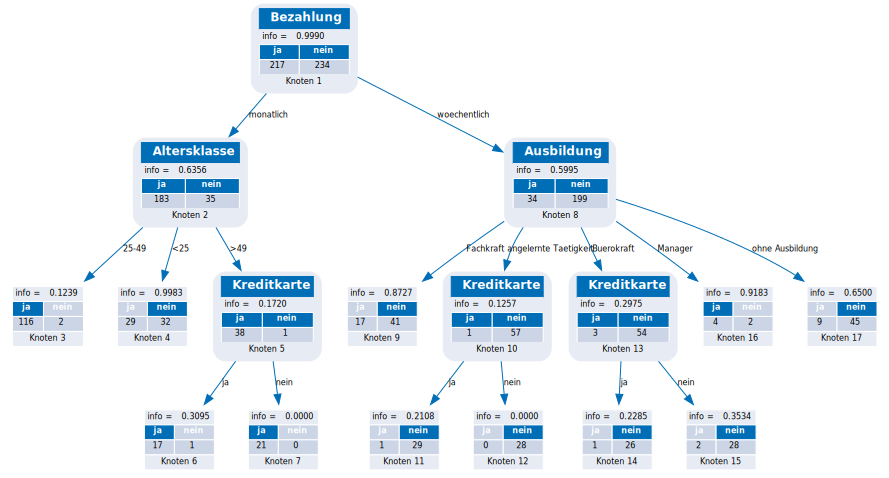

In [19]:
vs = TreeVisualizer()
dot = vs.DrawTree(tree = id3Tree)
dot

### Anwenden der Entscheidungsbaums auf die Testdaten

In [20]:
mask = id3Tree.Data.Df['_split'] == 'test'
dataFrameOfResult = id3Tree.applyTree(df[mask]) 
dataFrameOfResult

,Modell,Real
0,ja,ja
2,nein,nein
5,nein,ja
6,ja,ja
8,nein,nein
...,...,...
635,nein,ja
636,ja,ja
637,nein,ja
638,nein,ja


### Ausgabe des Tests als Kreuztabelle

In [21]:
crossTable = pd.crosstab(dataFrameOfResult['Modell'],
                             dataFrameOfResult['Real'],
                             margins= True, margins_name='Summe')    
crossTable

Real,ja,nein,Summe
Modell,,,
ja,67,2,69
nein,26,99,125
Summe,93,101,194
